In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
titanic = pd.read_csv('/content/drive/MyDrive/titanic.csv')
mpg = pd.read_csv('/content/drive/MyDrive/mpg.csv')

In [3]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


###1.Class별 나이와 요금 평균

In [4]:
titanic_Pclass = titanic.groupby('Pclass').mean()[['Age','Fare']]
titanic_Pclass

<ipython-input-4-79656305aed9>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  titanic_Pclass = titanic.groupby('Pclass').mean()[['Age','Fare']]


,Age,Fare
Pclass,,
1,38.233441,84.154687
2,29.877630,20.662183
3,25.140620,13.675550


<Axes: xlabel='Pclass'>

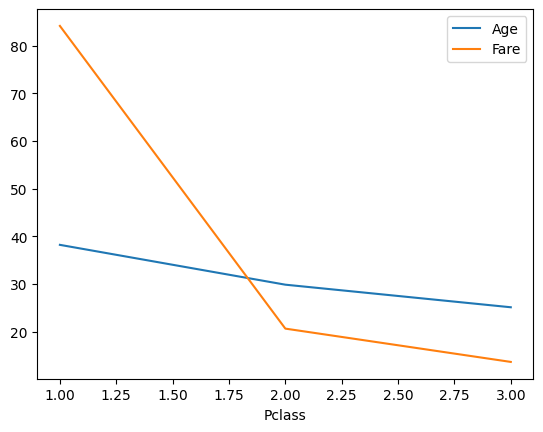

In [5]:
titanic_Pclass.plot(kind='line')

###2.Class별 성별 빈도 

In [6]:
pd.crosstab(titanic.Pclass, titanic.Sex,margins=True).style.background_gradient(cmap='summer_r')

Sex,female,male,All
Pclass,,,
1,94,122,216
2,76,108,184
3,144,347,491
All,314,577,891


###3.생존률

<Axes: ylabel='Survived'>

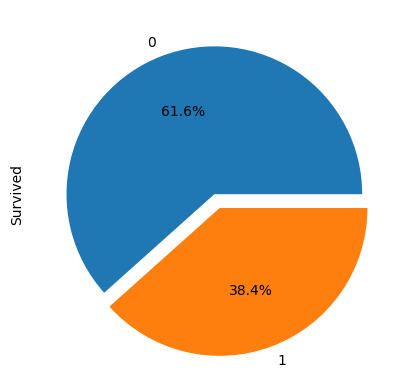

In [7]:
titanic['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%')
# explode : 파이 조각이 돌출되는 크기(0이면 돌출x) - 2번째 파이조각을 돌출
# autopct : 파이 조각의 전체 대비 백분율 - 소수점 1자리까지 %로 표기

###4.성별 생존률


In [8]:
titanic.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

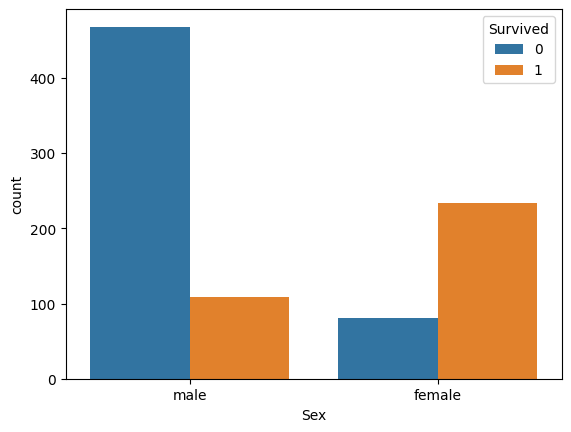

In [9]:
ax = sns.countplot(x='Sex', hue = 'Survived', data=titanic)

###5.나이와 성별에 따른 생존률

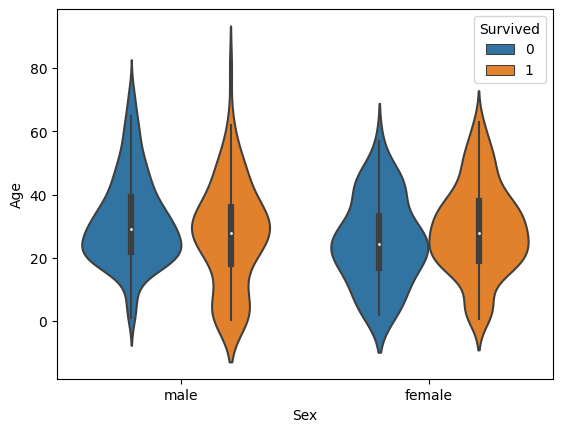

In [19]:
ax = sns.violinplot(x='Sex',y='Age',hue='Survived',data=titanic)

###6.좌석과 성별에 따른 생존률

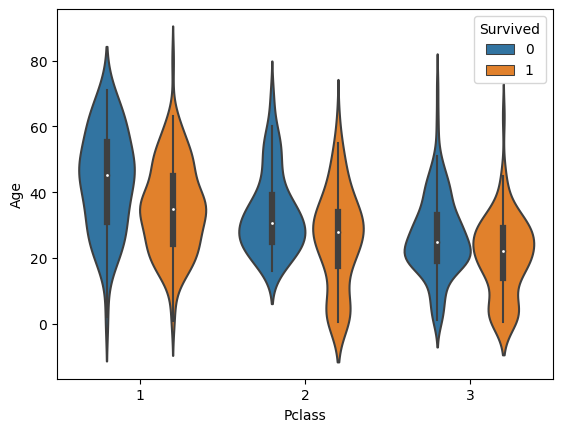

In [20]:
ax = sns.violinplot(x='Pclass',y='Age',hue='Survived',data=titanic)

In [21]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


###1.manufacturer 비율

<Axes: ylabel='manufacturer'>

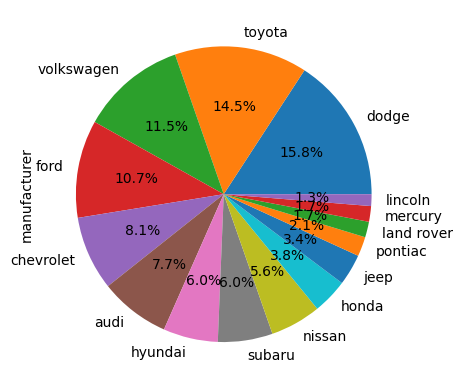

In [25]:
mpg['manufacturer'].value_counts().plot.pie(autopct='%1.1f%%')

###2. 제조사별 cty 평균

<ipython-input-27-39bdf1fe70ff>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cty_mean = mpg.groupby(mpg['manufacturer']).mean().sort_values(by = ['cty'], ascending = False)[['cty']]


<Axes: xlabel='manufacturer'>

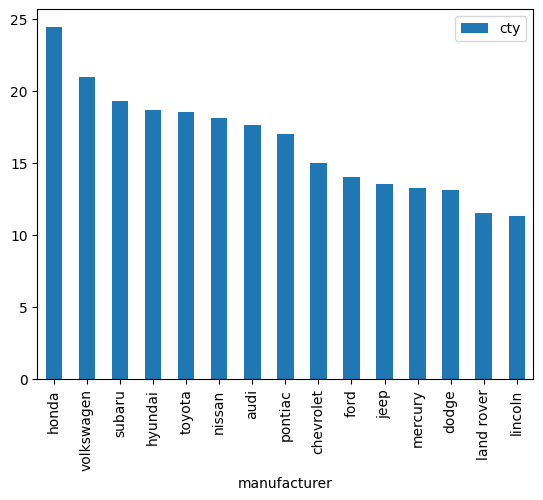

In [27]:
cty_mean = mpg.groupby(mpg['manufacturer']).mean().sort_values(by = ['cty'], ascending = False)[['cty']]
cty_mean.plot.bar()

###3.mpg 연속형 데이터 상관관계 분석

In [32]:
mpg.corr()

<ipython-input-32-29f2cbb04a8f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mpg.corr()


,displ,year,cyl,cty,hwy
displ,1.000000,0.147843,0.930227,-0.798524,-0.766020
year,0.147843,1.000000,0.122245,-0.037232,0.002158
cyl,0.930227,0.122245,1.000000,-0.805771,-0.761912
cty,-0.798524,-0.037232,-0.805771,1.000000,0.955916
hwy,-0.766020,0.002158,-0.761912,0.955916,1.000000


<ipython-input-33-706a58144876>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data = mpg.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')


<Axes: >

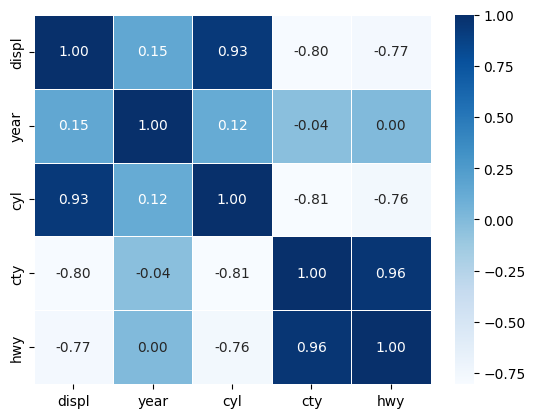

In [33]:
sns.heatmap(data = mpg.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

###4.hwy와 cty의 상관 관계

In [30]:
mpg[['hwy','cty']].corr()

,hwy,cty
hwy,1.000000,0.955916
cty,0.955916,1.000000


<Axes: xlabel='hwy', ylabel='cty'>

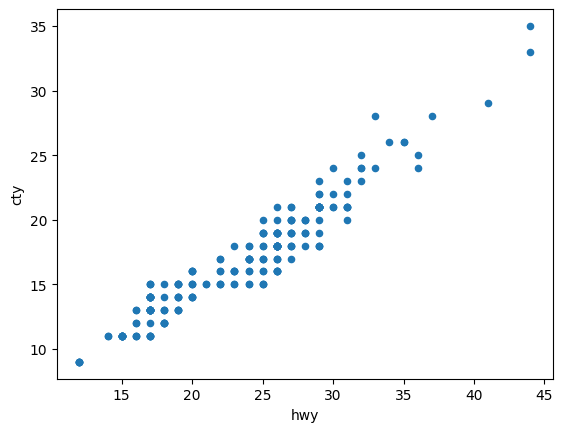

In [31]:
mpg.plot(kind='scatter',x='hwy',y='cty')

- displ : year, cyl 변수와 연관이 많다.
- year : displ, cyl과 연관있고, cty와는 연관이 적으며 hwy는 연관 없다.
- cyl : displ, year과 연관있고, cty, hwy와는 연관 없다,
- cty & hwy : cty, hwy 서로 연관 있고 나머지 변수와는 연관 없다.

###5.category별 displ평균

<ipython-input-62-17a50e5bcaa9>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ccd = mpg.groupby('category').mean()['displ']


<Axes: xlabel='category'>

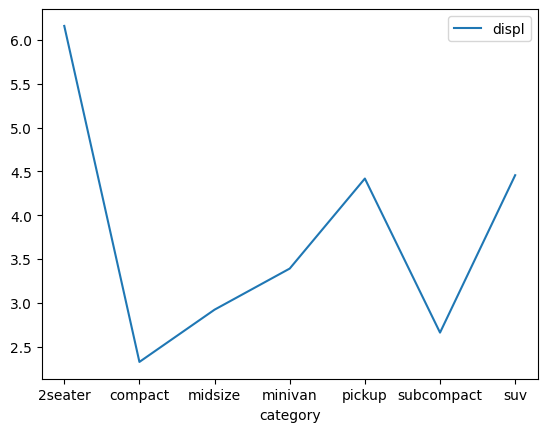

In [62]:
ccd = mpg.groupby('category').mean()['displ']
ccd = ccd.to_frame()
ccd.plot()